In [1]:
import cv2


In [2]:
import numpy as np
from matplotlib import pyplot as plt

In [3]:
img = cv2.imread('laba2kz.jpg')

In [4]:
img=cv2.cvtColor(img,cv2.COLOR_BGR2HSV)
img=cv2.cvtColor(img,cv2.COLOR_HSV2RGB)

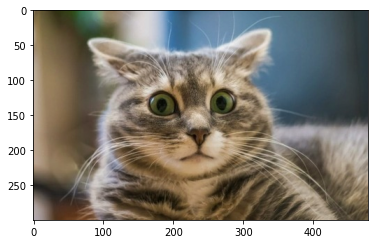

In [5]:
plt.imshow(img)

In [6]:
img.shape
X=img.shape[0]
Y=img.shape[1]
print(img.shape)

(300, 479, 3)


Свертка

In [7]:
R=S=C=3

In [8]:
W=np.random.random_sample(size=(5,C,R,S))
print(W)
B=np.zeros(5)
O=np.zeros((5,X-2,Y-2))

[[[[0.09803619 0.88936471 0.8449214 ]
   [0.63326284 0.28037603 0.68846544]
   [0.65852637 0.2216388  0.38734285]]

  [[0.58270176 0.78560145 0.97128743]
   [0.411621   0.41744288 0.83019423]
   [0.41476256 0.07247934 0.20641476]]

  [[0.6927614  0.21705541 0.07446703]
   [0.13870806 0.50704187 0.79754714]
   [0.59545129 0.29990321 0.54761374]]]


 [[[0.80769679 0.72121255 0.04860282]
   [0.44315638 0.37526133 0.75591407]
   [0.34717371 0.19008847 0.86127458]]

  [[0.13862818 0.83835834 0.63029901]
   [0.19972796 0.17765191 0.57079456]
   [0.13603446 0.09779307 0.09755156]]

  [[0.35968235 0.20234179 0.43575605]
   [0.46828865 0.7308761  0.80246928]
   [0.53428609 0.2399384  0.19743098]]]


 [[[0.36441326 0.45860774 0.15452712]
   [0.34765214 0.9377538  0.28647085]
   [0.68945791 0.31431039 0.04451347]]

  [[0.53134408 0.09717979 0.82880012]
   [0.00644942 0.19013166 0.32883607]
   [0.592275   0.21779101 0.63961525]]

  [[0.1610932  0.40778852 0.21258798]
   [0.273467   0.70855748 0.38

In [9]:
for m in range(5) :
    for x in range(X-2) :
        for y in range(Y-2) :
            O[m][x][y]=B[m];
            for i in range(R) :
                for j in range(S) :
                    for k in range(C) :
                        O[m][x][y]+=img[x+i][y+i][k]*W[m][k][i][j]

In [10]:
print(O)

[[[1721.34321868 1548.57850504 1375.19856552 ...  722.92982522
    727.36136988  730.65499153]
  [1659.08304369 1470.66680353 1318.84325294 ...  719.5256923
    723.95723696  730.65499153]
  [1615.41000902 1435.68527257 1275.04976701 ...  719.5256923
    719.25257747  722.54619912]
  ...
  [2296.60162741 2277.23864638 2265.70559344 ... 1038.693954
   1072.88118752 1121.50821776]
  [2299.55447894 2280.19149791 2261.55475891 ... 1076.78850905
   1149.04196049 1178.06450809]
  [2307.66327135 2282.90197417 2261.55475891 ... 1138.60948011
   1198.89777401 1213.13830203]]

 [[1472.62613259 1319.70446902 1169.4839876  ...  619.35297269
    625.55672987  629.10002906]
  [1418.19360364 1251.80567153 1120.10774745 ...  616.65140136
    622.85515855  629.10002906]
  [1379.24007738 1221.06343239 1082.12343432 ...  616.65140136
    618.33101831  621.8743175 ]
  ...
  [1983.52133173 1965.233501   1957.5658516  ...  883.15074892
    913.53460173  955.35000147]
  [1986.51467232 1968.22684159 1953.7058

Нормализация

In [11]:
norm_img = np.zeros(O.shape)
gamma=1
beta = 0
epsilon = 1e-12  
for m in range(5):
    mean = np.average(O[m], axis=0)
    var = np.var(O[m], axis=0)
    img_ = (O[m] - mean) / np.sqrt(var + epsilon)
    norm_img[m] = gamma * img_ + beta
print(norm_img)

[[[-0.62649302 -0.9248426  -1.23571244 ... -0.74995066 -0.74109479
   -0.73288682]
  [-0.76502618 -1.09808205 -1.36150796 ... -0.75527682 -0.74637626
   -0.73288682]
  [-0.86220168 -1.17586473 -1.45926314 ... -0.75527682 -0.75367549
   -0.74528553]
  ...
  [ 0.6534964   0.6953592   0.7520645  ... -0.2559006  -0.20502505
   -0.13525453]
  [ 0.66006669  0.70192497  0.74279906 ... -0.1962972  -0.08686255
   -0.0487774 ]
  [ 0.67810931  0.70795181  0.74279906 ... -0.09957103 -0.00951187
    0.00485202]]

 [[-0.63817128 -0.94518194 -1.25704533 ... -0.74781886 -0.73581377
   -0.72675097]
  [-0.77852211 -1.12004393 -1.38466482 ... -0.75272685 -0.74068307
   -0.72675097]
  [-0.87896131 -1.19921543 -1.48284035 ... -0.75272685 -0.74883736
   -0.73958501]
  ...
  [ 0.67913965  0.71727013  0.77985753 ... -0.26857328 -0.21676355
   -0.14727769]
  [ 0.68685779  0.72497898  0.76988076 ... -0.2013599  -0.0980875
   -0.0571319 ]
  [ 0.70548883  0.73108301  0.76988076 ... -0.10203572 -0.01976893
   -0.0

ReLU

In [12]:
relu_img=np.maximum(0,norm_img)
print(relu_img)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.6534964  0.6953592  0.7520645  ... 0.         0.         0.        ]
  [0.66006669 0.70192497 0.74279906 ... 0.         0.         0.        ]
  [0.67810931 0.70795181 0.74279906 ... 0.         0.         0.00485202]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.67913965 0.71727013 0.77985753 ... 0.         0.         0.        ]
  [0.68685779 0.72497898 0.76988076 ... 0.         0.         0.        ]
  [0.70548883 0.73108301 0.76988076 ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.      

MAX POOLING 2х2

In [13]:
relu_img.shape

(5, 298, 477)

In [14]:
width = relu_img.shape[1]//2
height = relu_img.shape[2]//2
res_shape=(5,width,height)
max_p=np.zeros(res_shape)
for m in range(5):
     for i in range(width):
        for j in range(height):
            max_p[m, i, j] = np.max(relu_img[m, i*2:(i+1)*2, j*2:(j+1)*2])
print(max_p)

[[[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.69802678 0.78089284 0.82317712 ... 0.         0.         0.        ]
  [0.70296407 0.7684042  0.82902326 ... 0.         0.         0.        ]
  [0.70795181 0.78586421 0.83026841 ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.         0.         ... 0.         0.         0.        ]
  ...
  [0.71834483 0.80602686 0.85736572 ... 0.         0.         0.        ]
  [0.72266598 0.79689664 0.86640002 ... 0.         0.         0.        ]
  [0.73108301 0.81252081 0.87002833 ... 0.         0.         0.        ]]

 [[0.         0.         0.         ... 0.         0.         0.        ]
  [0.         0.      

SoftMax

In [15]:
result=np.exp(max_p)/sum(np.exp(max_p))
print(result)

[[[0.2        0.2        0.2        ... 0.2        0.2        0.2       ]
  [0.2        0.2        0.2        ... 0.2        0.2        0.2       ]
  [0.2        0.2        0.2        ... 0.2        0.2        0.2       ]
  ...
  [0.19328142 0.19460406 0.19196417 ... 0.2        0.2        0.2       ]
  [0.19329734 0.1941908  0.19199163 ... 0.2        0.2        0.2       ]
  [0.19271909 0.19356267 0.19151418 ... 0.2        0.2        0.2       ]]

 [[0.2        0.2        0.2        ... 0.2        0.2        0.2       ]
  [0.2        0.2        0.2        ... 0.2        0.2        0.2       ]
  [0.2        0.2        0.2        ... 0.2        0.2        0.2       ]
  ...
  [0.19724869 0.19955722 0.19864063 ... 0.2        0.2        0.2       ]
  [0.19714343 0.19980335 0.19930346 ... 0.2        0.2        0.2       ]
  [0.19722887 0.19879178 0.19928217 ... 0.2        0.2        0.2       ]]

 [[0.2        0.2        0.2        ... 0.2        0.2        0.2       ]
  [0.2        0.2     

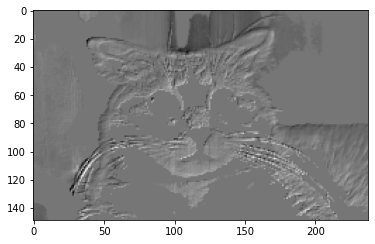

In [16]:
plt.imshow(result[0], cmap='gray')


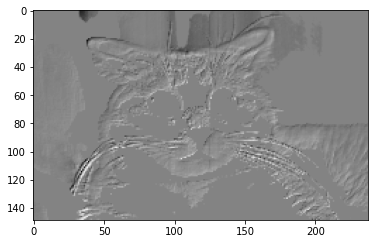

In [17]:
plt.imshow(result[1], cmap='gray')

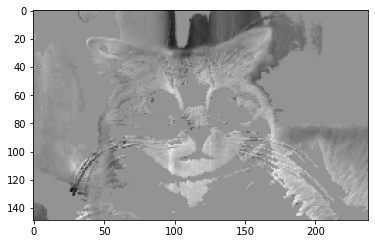

In [18]:
plt.imshow(result[2], cmap='gray')

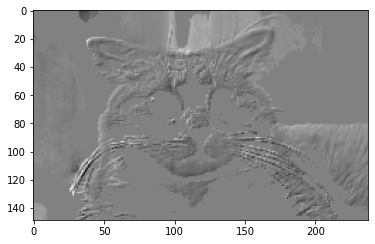

In [19]:
plt.imshow(result[3], cmap='gray')

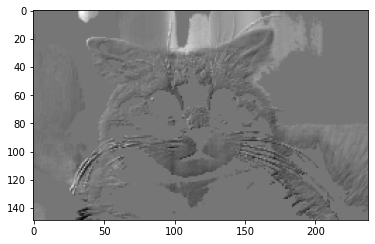

In [20]:
plt.imshow(result[4], cmap='gray')

In [21]:
result.shape

(5, 149, 238)